# Knock Airport Weather
**Andre Hoarau**

## The objective of this notebook is to develop a progamme using data obtained from Knock Airport in Mayo Ireland: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv
## The program(s) will plot
    * The temperature
    * The mean temperature each day
    * The mean temperature each month
    * The windspeed
    * The rolling windspeed over 24 hours 
    * The max windspeed each day 
    * The monthly mean of the daily max windspeeds.

In [1]:
# Import out packages
import pandas as pd
knock_data= "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df= pd.read_csv(knock_data, skiprows=22)
df.head()

C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_43964\3445903213.py:4: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(knock_data, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [2]:
# I want to tidy the DF and remove any temp that is 0 from looking at it if it wasn't recorded it was left as 0. Whilst sometimes this might be true at lower temperatrues it appears to go closer to decimal places and therefore I feel this is efficient enough to not lose too much data.
df.drop(df.loc[df["temp"]==0].index, inplace=True)

In [3]:
# Get matplot lib 
import matplotlib.pyplot as plt


In [4]:
df.head

<bound method NDFrame.head of                      date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
0       10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0   
1       31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0   
2       31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0   
3       31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0   
4       31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0   
...                   ...  ...  ...    ...   ...    ...   ...    ...    ...   
247669  31-oct-2024 20:00    0  0.2      0  10.1      0  10.1   10.1   12.4   
247670  31-oct-2024 21:00    0  0.1      0  10.1      0  10.1   10.0   12.4   
247671  31-oct-2024 22:00    0  0.0      0  10.0      0  10.0   10.0   12.3   
247672  31-oct-2024 23:00    0  0.1      0   9.8      0   9.8    9.8   12.1   
247673  01-nov-2024 00:00    0  0.0      0   9.7      0   9.6    9.6   11.9   

        rhum  ... ind

In [5]:
# Step 1: Convert the first column to datetime, if needed
df["date"] = pd.to_datetime(df["date"])

# Step 2: Set the datetime column as the index
df_dateindex= df.set_index("date")

# Step 3: Resample to daily frequency at midnight and use the mean (or any other aggregation function)
df_daily = df_dateindex.resample("D").first()  # 'first' keeps the first row of each day, which is 00:00 if data is hourly

# Reset the index if you want "date" to be a column again
df_daily = df_daily.reset_index()

print(df_daily)

C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_43964\4049500963.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


            date  ind  rain  ind.1  temp  ind.2  wetb  dewpt  vappr   rhum  \
0     1996-04-10  0.0   0.0    0.0  11.5    0.0   8.1    3.9    0.0    0.0   
1     1996-04-11  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
2     1996-04-12  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
3     1996-04-13  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
4     1996-04-14  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
...          ...  ...   ...    ...   ...    ...   ...    ...    ...    ...   
10428 2024-10-28  0.0   0.4    0.0  12.3    0.0  12.3   12.3   14.3  100.0   
10429 2024-10-29  0.0   0.0    0.0   9.9    0.0   9.9    9.9   12.2  100.0   
10430 2024-10-30  0.0   0.0    0.0  10.9    0.0  10.9   10.9   13.0  100.0   
10431 2024-10-31  0.0   0.1    0.0  10.5    0.0  10.5   10.5   12.7  100.0   
10432 2024-11-01  0.0   0.0    0.0   9.7    0.0   9.6    9.6   11.9   99.0   

       ... ind.3  wdsp ind.4  wddir    ww     w  sun    vis  cl

In [6]:
df_daily.dropna()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10,0.0,0.0,0.0,11.5,0.0,8.1,3.9,0.0,0.0,...,0.0,0,0.0,0,25,81,0.0,35000,32,5
112,1996-07-31,0.0,0.0,0.0,11.5,0.0,11.1,10.7,0.0,0.0,...,0.0,0,0.0,0,25,82,0.0,40000,45,5
113,1996-08-01,0.0,0.0,0.0,9.7,0.0,9.0,8.3,0.0,0.0,...,0.0,0,0.0,0,1,81,0.0,35000,999,3
114,1996-08-02,0.0,0.0,0.0,10.3,0.0,9.6,8.9,11.4,91.0,...,2.0,4,2.0,260,1,82,0.0,35000,30,6
115,1996-08-03,0.0,0.0,0.0,12.1,0.0,11.7,11.3,13.4,95.0,...,2.0,5,2.0,230,2,11,4.9,40000,39,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10428,2024-10-28,0.0,0.4,0.0,12.3,0.0,12.3,12.3,14.3,100.0,...,2.0,9,2.0,210,,,0.0,,0,8
10429,2024-10-29,0.0,0.0,0.0,9.9,0.0,9.9,9.9,12.2,100.0,...,2.0,3,2.0,250,,,0.0,,0,8
10430,2024-10-30,0.0,0.0,0.0,10.9,0.0,10.9,10.9,13.0,100.0,...,2.0,2,2.0,190,,,0.0,,0,8
10431,2024-10-31,0.0,0.1,0.0,10.5,0.0,10.5,10.5,12.7,100.0,...,2.0,6,2.0,210,,,0.0,,0,8


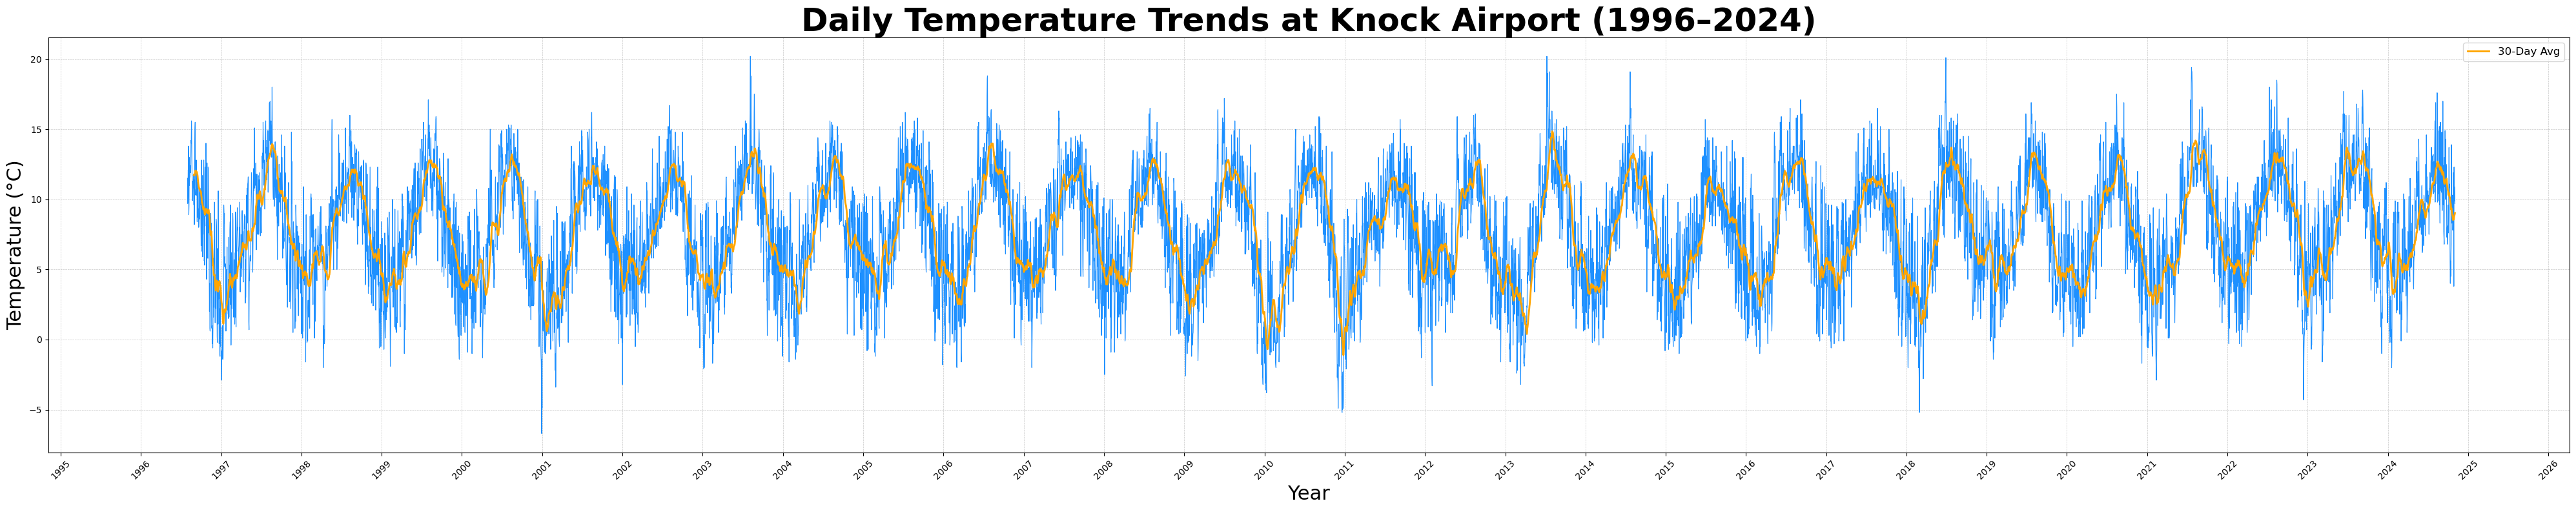

In [7]:
import matplotlib.dates as mdates

date= df_daily["date"]
temp= df_daily["temp"]
fig = plt.figure(figsize=(40,8))  # Increase height for readability
plt.plot(date, temp, color='dodgerblue', linewidth=0.8)  # Add color and line adjustments

# Customize the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks

df_daily['rolling_avg'] = temp.rolling(window=30).mean()  # 30-day rolling average
plt.plot(date, df_daily['rolling_avg'], color='orange', label='30-Day Avg', linewidth=2)

plt.xticks(rotation=45)  # Rotate for readability
plt.title("Daily Temperature Trends at Knock Airport (1996–2024)", fontsize=36, fontweight='bold')
plt.xlabel("Year", fontsize=22)
plt.ylabel("Temperature (°C)", fontsize=22)

plt.legend(fontsize=12)


plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
plt.tight_layout()  # Avoid overlap
plt.show()


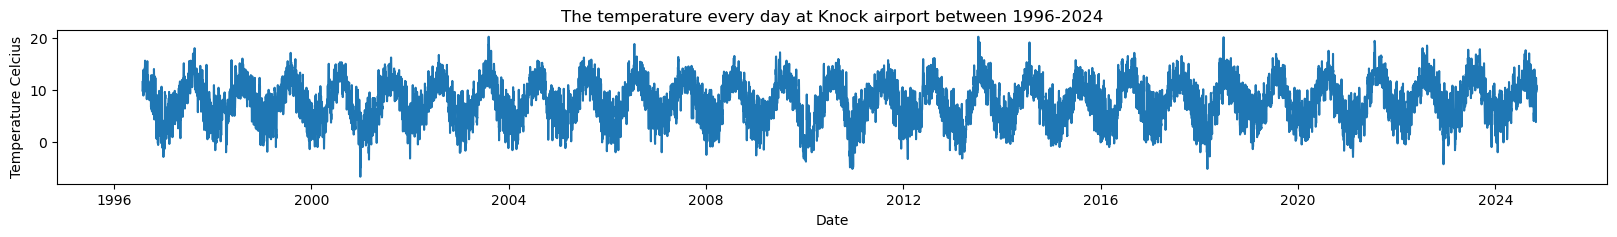

In [8]:

fig = plt.figure(figsize=(20, 2))
plt.xlabel("Date")
plt.ylabel("Temperature Celcius")
plt.title("The temperature every day at Knock airport between 1996-2024")
plt.plot(date,temp)

### Overall I feel we can see that it's not the best to plot this much data on one plot.
### Lets keep that in mind for the next part, the mean temperature each day.


In [9]:
# We take our indexed DF and resample on the daily with the average value.

df_daily_average = df_dateindex["temp"].resample("D").mean()

# We will convert this series back to a df reset the index.
df_daily_average = df_daily_average.dropna().reset_index(name="temp")



In [10]:
# Now lets make our plot 
datedaily = df_daily_average["date"]


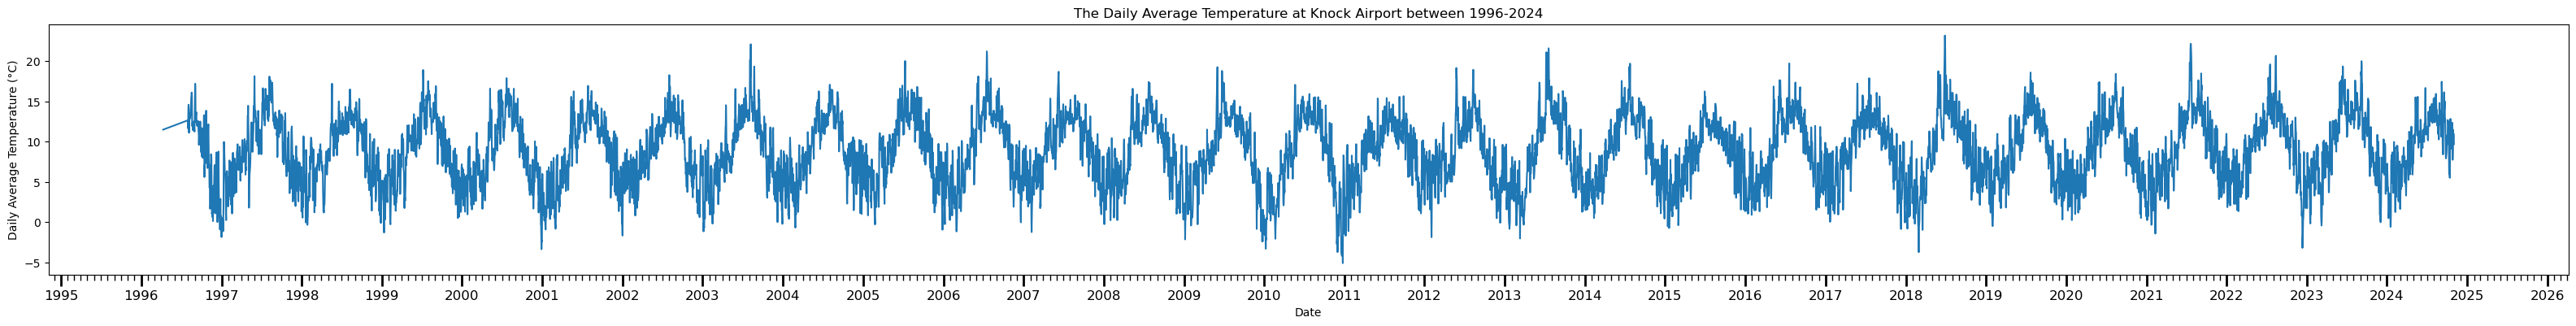

In [11]:

from matplotlib.ticker import NullFormatter

# Assuming `datedaily` is a datetime-like pandas series or similar
daily_average_temp = df_daily_average["temp"]

# Create the figure
fig = plt.figure(figsize=(40, 4))
plt.xlabel("Date")
plt.ylabel("Daily Average Temperature (°C)")
plt.title("The Daily Average Temperature at Knock Airport between 1996-2024")

# Plot the data
plt.plot(datedaily, daily_average_temp)

# Format the x-axis to show major ticks for years and minor ticks for months
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks at the start of each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks at the start of each month
ax.xaxis.set_minor_formatter(NullFormatter())  # Remove minor tick labels

# Customize the tick appearance
plt.tick_params(axis='x', which='major', length=10, width=2, labelsize=12)
plt.tick_params(axis='x', which='minor', length=5, width=1)

# Show the plot
plt.show()



### Now we will look at the mean temperature each month.

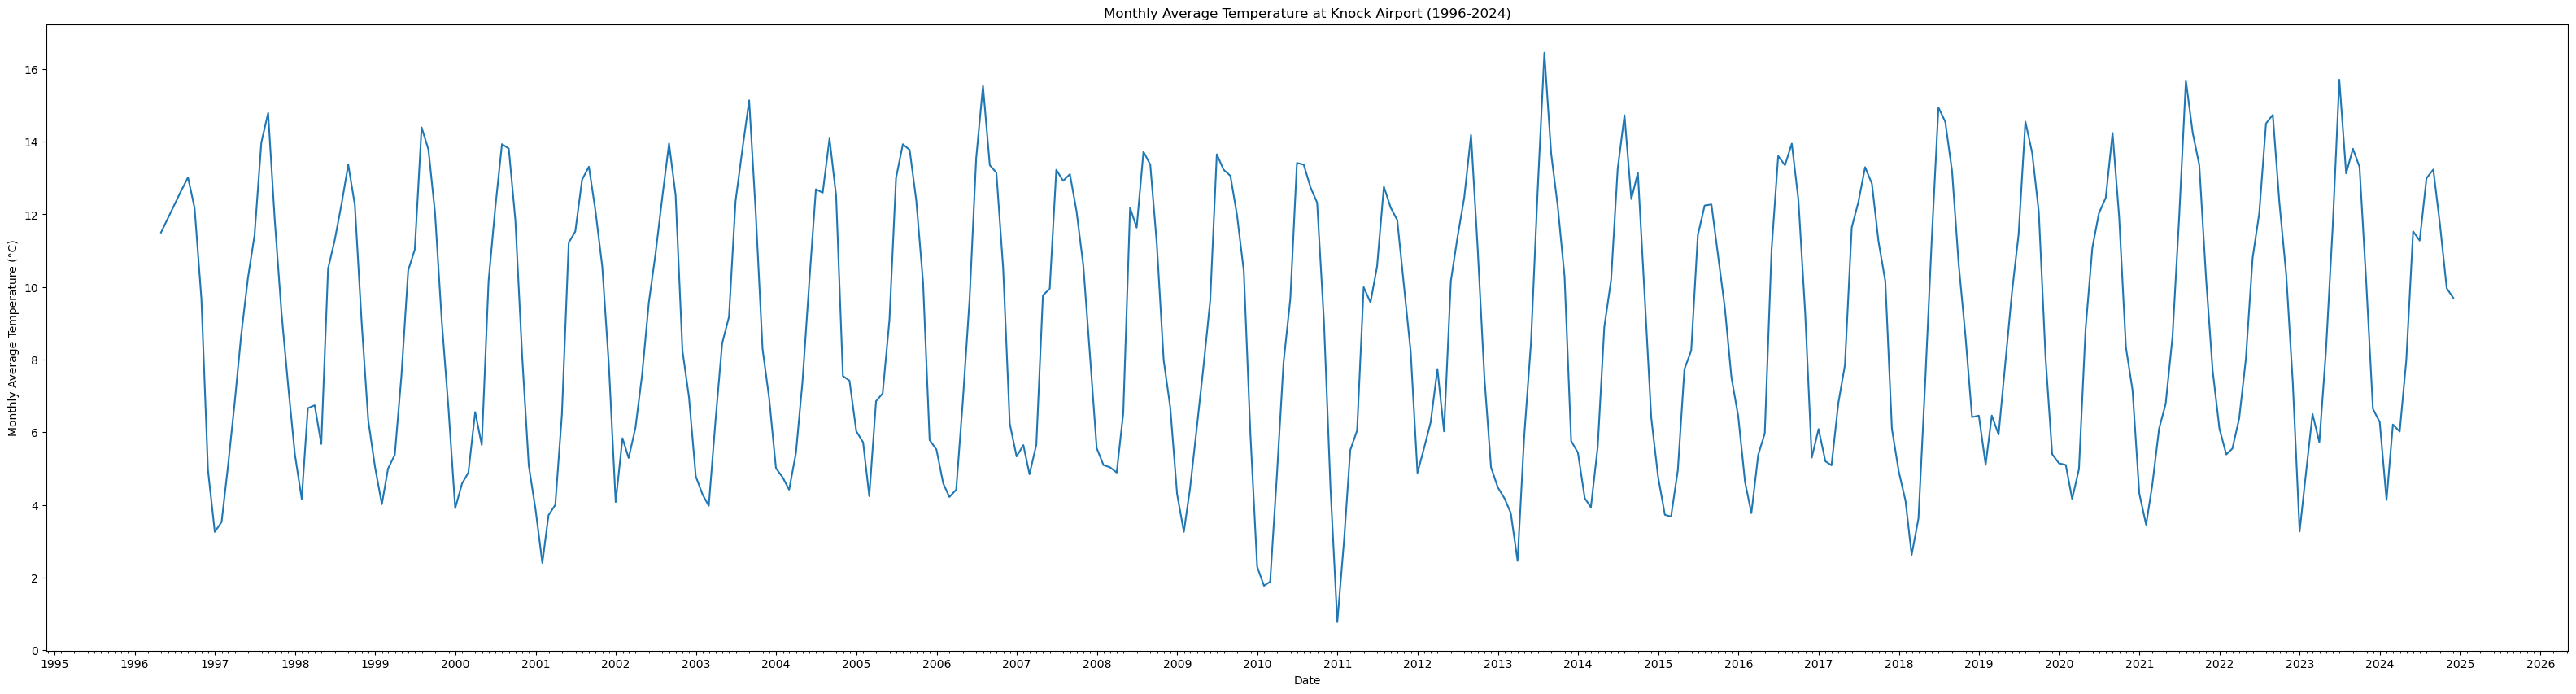

In [12]:

month_average = df_dateindex["temp"].resample("ME").mean()
# Drop NaN values and reset the index
month_average = month_average.dropna().reset_index(name="temp")

# Set up variables
datemonth = month_average["date"]
monthtemp = month_average["temp"]

# Plot
fig = plt.figure(figsize=(40, 10))
plt.xlabel("Date")
plt.ylabel("Monthly Average Temperature (°C)")
plt.title("Monthly Average Temperature at Knock Airport (1996-2024)")

ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks at the start of each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks at the start of each month
ax.xaxis.set_minor_formatter(NullFormatter())  # Remove minor tick labels

plt.plot(datemonth, monthtemp)
plt.show()



### Next we will look at the windspeed
* In this data set the wind speed (wdsp) is the average wind speed per dat in knots.

date     datetime64[ns]
ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp            float64
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
dtype: object


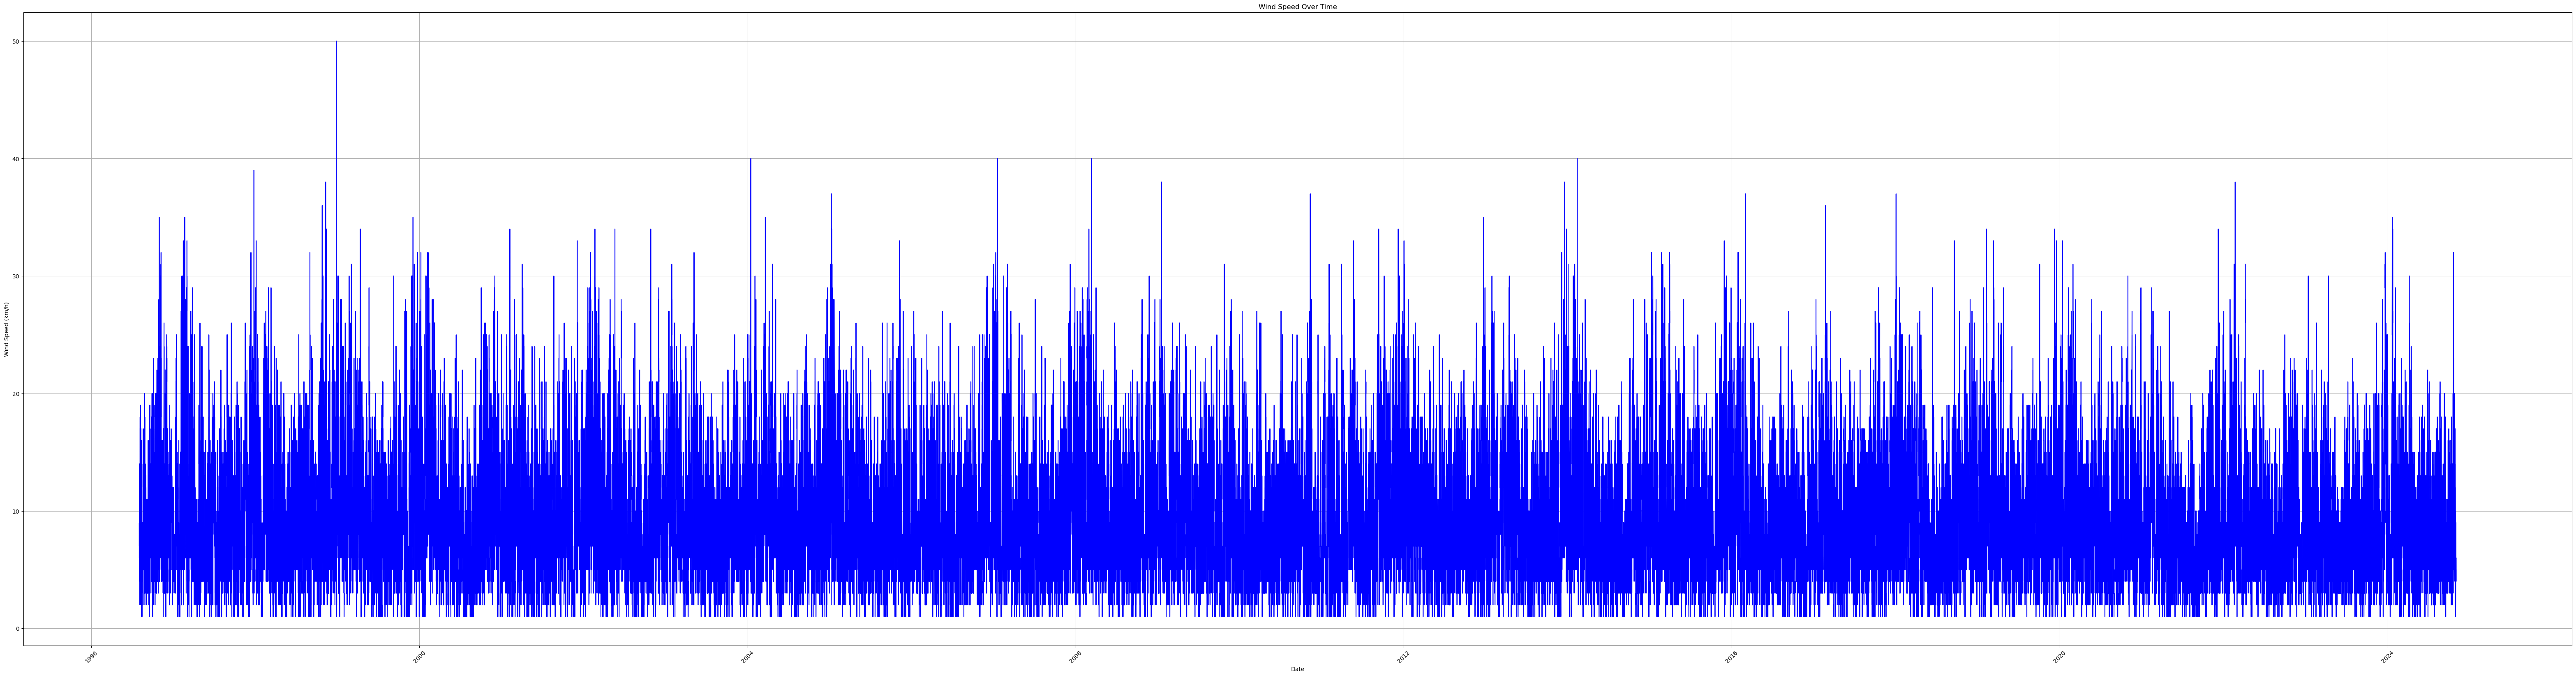

In [22]:
daily_average_windspeed= df["wdsp"]
# We want to adjust the df first to remove any 0 values as they are not recorded values.
print (df.dtypes)
# We can see that the wind speed is an object and we need to convert it to a float.
df["wdsp"] = pd.to_numeric(df["wdsp"], errors='coerce')
# We are now removing the rows where the wind speed is 0 as these are NAN values.
daily_average_wdsp_adjusted= df.drop(df.loc[df["wdsp"]==0].index, inplace=True)

plt.figure(figsize=(80, 20))
plt.plot(df["date"], df["wdsp"], linestyle='-', color='b')  # You can customize the line style/marker
plt.xlabel("Date")
plt.ylabel("Wind Speed (km/h)")
plt.title("Wind Speed Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


References:
* [Stack overflow on drop](https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value) - This link told me about drop.